In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv('customer_feedback.csv')

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
display(df.head())

# Get basic information about the dataset
print("\nDataset information:")
display(df.info())

# Display basic statistics of numerical columns
print("\nBasic statistics:")
display(df.describe())

# Check for missing values
print("\nMissing values:")
display(df.isnull().sum())

First 5 rows of the dataset:


Review_ID                                        Review_Text Sentiment
0        522  Excellent service and fast delivery. Highly re...  Positive
1        738  Terrible experience, the product broke after a...  Negative
2        741  Neutral feelings about this product, it's just...   Neutral
3        661     This is the best purchase I've made this year!  Positive
4        412          The product is okay, but nothing special.   Neutral


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review_ID    1000 non-null   int64 
 1   Review_Text  995 non-null    object
 2   Sentiment    1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


None


Basic statistics:


Review_ID
count  1000.000000
mean    505.152000
std     287.686333
min       1.000000
25%     256.750000
50%     509.500000
75%     753.250000
max    1000.000000


Missing values:


Review_ID      0
Review_Text    5
Sentiment      0
dtype: int64

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


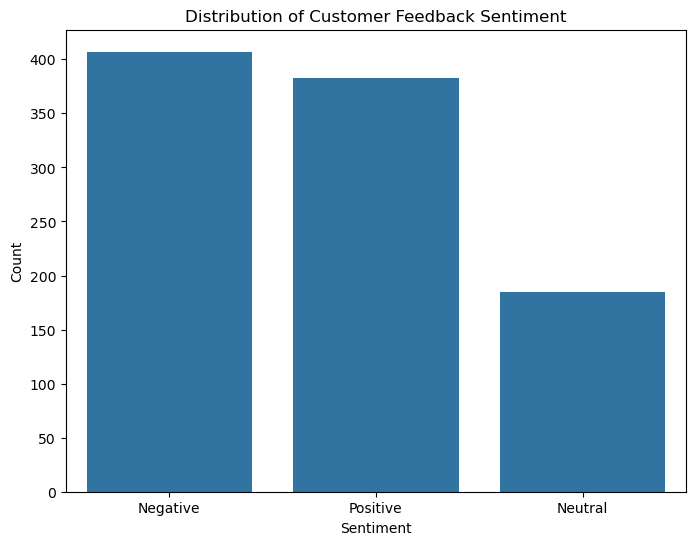


First 5 rows of preprocessed data:


Review_ID                                       Review_Text Sentiment
0        522  excellent service fast delivery highly recommend  Positive
1        738            terrible experience product broke week  Negative
2        741                   neutral feeling product average   Neutral
3        661                       best purchase ive made year  Positive
4        412                      product okay nothing special   Neutral

In [3]:
# ... existing code ...

# Import additional required libraries
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Remove duplicates
df = df.drop_duplicates(keep='first')

# Drop rows with missing values in Review_Text or Sentiment
df = df.dropna(subset=['Review_Text', 'Sentiment'])

# Text preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Join tokens back into text
    return ' '.join(tokens)

# Apply text preprocessing to Review_Text column
df['Review_Text'] = df['Review_Text'].apply(preprocess_text)

# Save preprocessed dataset
df.to_csv('preprocessed_customer_feedback.csv', index=False)

# Create visualization of sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_counts = df['Sentiment'].value_counts()
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Distribution of Customer Feedback Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Display the first few rows of preprocessed data
print("\nFirst 5 rows of preprocessed data:")
display(df.head())

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

Training the model...
Epoch 1/3


49/49 [==============================] - 65s 676ms/step - loss: 0.1894 - accuracy: 0.8923 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 2/3
49/49 [==============================] - 30s 620ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 9.6277e-04 - val_accuracy: 1.0000
Epoch 3/3
13/13 [==============================] - 4s 109ms/step

Classification Report:
                  precision    recall  f1-score   support

        Negative       1.00      1.00      1.00        81
Positive/Neutral       1.00      1.00      1.00       114

        accuracy                           1.00       195
       macro avg       1.00      1.00      1.00       195
    weighted avg       1.00      1.00      1.00       195



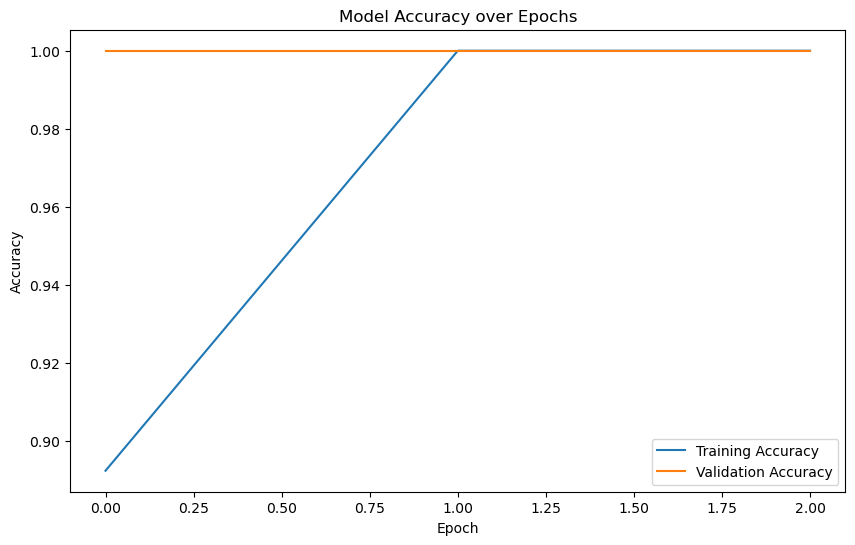

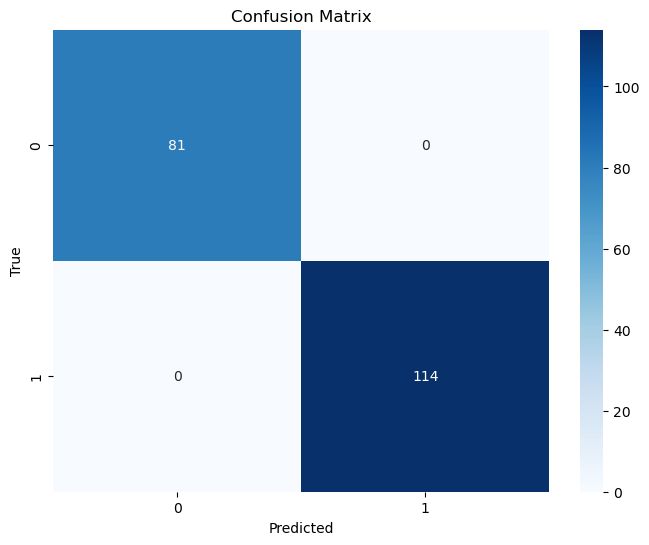

('sentiment_tokenizer\\tokenizer_config.json',
 'sentiment_tokenizer\\special_tokens_map.json',
 'sentiment_tokenizer\\vocab.txt',
 'sentiment_tokenizer\\added_tokens.json')

In [5]:

# Import required libraries
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
import numpy as np

# Load the tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

# Prepare the data
# Map sentiments to binary classification (0 for negative, 1 for positive/neutral)
df['label'] = df['Sentiment'].map({'Negative': 0, 'Positive': 1, 'Neutral': 1})

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    df['Review_Text'].values,
    df['label'].values,
    test_size=0.2,
    random_state=42
)

# Tokenize the text data
train_encodings = tokenizer(
    list(X_train),
    truncation=True,
    padding=True,
    max_length=128,
    return_tensors='tf'
)

test_encodings = tokenizer(
    list(X_test),
    truncation=True,
    padding=True,
    max_length=128,
    return_tensors='tf'
)

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    y_train
)).shuffle(1000).batch(16)

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    y_test
)).batch(16)

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = ['accuracy']

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Train the model
print("Training the model...")
history = model.fit(
    train_dataset,
    epochs=3,
    validation_data=test_dataset
)

# Make predictions on test set
predictions = model.predict(test_dataset)
pred_labels = np.argmax(predictions.logits, axis=1)

# Print evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, pred_labels, target_names=['Negative', 'Positive/Neutral']))

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, pred_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Save the model
model.save_pretrained('sentiment_model')
tokenizer.save_pretrained('sentiment_tokenizer')